# Sentiment Analysis and Predictive modeling of customer bookings

### Scrapped the data of British Airways Reviews to perform sentiment Analysis

In [172]:
#Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [173]:
#Scrape reviews from the Brirish airways website
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [174]:
#put them in dataframe
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Absolutely terrible, lost m..."
1,✅ Trip Verified | We booked premium economy r...
2,✅ Trip Verified | We chose Rotterdam and Lond...
3,✅ Trip Verified | The entire booking and ticke...
4,Not Verified | British Airways cancelled my ...


In [175]:
df.to_csv("Reviews.csv")

After collecting 1000 reviews data next step is to do data cleaning

## Data Cleaning

In [176]:
#Clean the data
df = pd.read_csv('Reviews.csv')
df['reviews'] = df['reviews'].apply(lambda x: x.split('|')[1].strip() if '|' in str(x) else x)
df.to_csv('Reviews_cleaned.csv', index=False)

In [177]:
#Check the length of the reviews
len(df["reviews"])

1000

In [178]:
df=pd.read_csv('Reviews_cleaned.csv')
df

,Unnamed: 0,reviews
0,0,"Absolutely terrible, lost my luggage on both f..."
1,1,We booked premium economy round trip from Phoe...
2,2,We chose Rotterdam and London City airport bec...
3,3,The entire booking and ticketing experience ha...
4,4,British Airways cancelled my flight less than ...
...,...,...
995,995,Madrid to London. We paid for business class a...
996,996,Dublin to London Heathrow. British Airways off...
997,997,London to Seattle. My seat was on the upper de...
998,998,"London to Gibraltar. Check in at T3 was fine, ..."


In [179]:
# Extracting 'reviews' column and converting to a list
data=df.reviews.values.tolist()
data[2]

'We chose Rotterdam and London City airport because of convenience, both small and having a hotel in the Docklands meant a short distance from City Airport. Three hours before our departure our flight was canceled however. Disappointing, but we made a swift move to Amsterdam Schiphol Airport, but unfortunately we were offered a flight to Heathrow, which meant almost 1,5 hours by tube to our hotel. Flight back operated out of LCY to RTM, but had a 30 mins delay, so in terms of punctuality BA is not very reliant. The flights were okay, with a snack and a drink. The E190 being far more comfortable with 2-2 seating and more legroom than the A319. Our extra expenses for the cancelled flight were handled promptly and we got all the money for extra transport and food back, so BA did a good job in this respect. But hesitant to book again, though they are the only airline flying between RTM and LCY.'

In [180]:
#Put all the data in the series form
data=pd.Series(data)
data

0      Absolutely terrible, lost my luggage on both f...
1      We booked premium economy round trip from Phoe...
2      We chose Rotterdam and London City airport bec...
3      The entire booking and ticketing experience ha...
4      British Airways cancelled my flight less than ...
                             ...                        
995    Madrid to London. We paid for business class a...
996    Dublin to London Heathrow. British Airways off...
997    London to Seattle. My seat was on the upper de...
998    London to Gibraltar. Check in at T3 was fine, ...
999    London to Boston. BA replaced A380 with a very...
Length: 1000, dtype: object

In [181]:
#Importing the regular expression module
import re 

# Applying a lambda function to each review in 'data' to remove non-alphabetic characters and convert to lowercase
data_processed = data.apply(lambda x: re.sub(r'[^a-zA-Z\s]+', '', x).lower())
data_processed[2]

'we chose rotterdam and london city airport because of convenience both small and having a hotel in the docklands meant a short distance from city airport three hours before our departure our flight was canceled however disappointing but we made a swift move to amsterdam schiphol airport but unfortunately we were offered a flight to heathrow which meant almost  hours by tube to our hotel flight back operated out of lcy to rtm but had a  mins delay so in terms of punctuality ba is not very reliant the flights were okay with a snack and a drink the e being far more comfortable with  seating and more legroom than the a our extra expenses for the cancelled flight were handled promptly and we got all the money for extra transport and food back so ba did a good job in this respect but hesitant to book again though they are the only airline flying between rtm and lcy'

In [182]:
# Downloading necessary resources for tokenization, stopwords, and WordNet
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\CUTY
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CUTY
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\CUTY
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [183]:
from nltk.corpus import stopwords 

# Loading the list of stopwords for the English language
stop_words = stopwords.words('english')
print(stop_words)
len(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [184]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
# Apply stemming to each word in the processed data while removing stopwords
data_final = data_processed.apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x) if word not in stop_words]))
data_final[2]

'chose rotterdam london citi airport conveni small hotel dockland meant short distanc citi airport three hour departur flight cancel howev disappoint made swift move amsterdam schiphol airport unfortun offer flight heathrow meant almost hour tube hotel flight back oper lci rtm min delay term punctual ba reliant flight okay snack drink e far comfort seat legroom extra expens cancel flight handl promptli got money extra transport food back ba good job respect hesit book though airlin fli rtm lci'

###  Uses NLTK's English stopwords list to filter out common English stopwords from the text data.

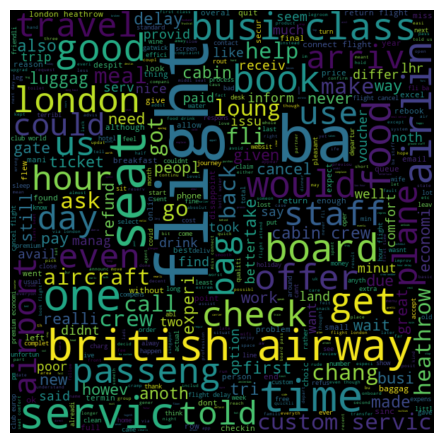

In [185]:
from nltk.corpus import stopwords  
from wordcloud import WordCloud  
import matplotlib.pyplot as plt  

# Combining all the processed text data into a single string
text = ' '.join(data_final)

# Creating a set of stopwords for English language
stopwords = set(stopwords.words('english'))

# Creating a WordCloud object with specified parameters
wc = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords)

# Generating the WordCloud from the text data
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')  
plt.axis('off') 
plt.show()  


### After obtaining the English stopwords list from NLTK, it further updates the stopwords set with additional domain-specific words

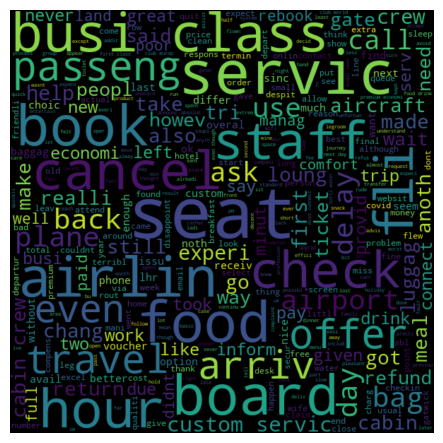

In [186]:
from nltk.corpus import stopwords  
from wordcloud import WordCloud  
import matplotlib.pyplot as plt  

text = ' '.join(data_final)

# Defining stopwords for the English language and adding domain-specific stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(['flight', 'one', 'ba', 'british', 'airway', 'would', 'time', 'heathrow', 'however',
                  'could', 'another', 'really', 'london', 'airline', 'us', 'get', 'good', 'told'])

wc = WordCloud(height=600, width=600, max_font_size=100, max_words=350, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')  
plt.axis('off') 
plt.show()

In [187]:
#Extracting 20 most common words along with their frequencies 
word_list=[]
for sentence in data_final:
    word_list.extend(nltk.word_tokenize(sentence)) 
freq_dist=nltk.FreqDist(word_list)
freq_dist.most_common(20)

[('flight', 2194),
 ('ba', 1289),
 ('seat', 919),
 ('servic', 765),
 ('time', 651),
 ('hour', 597),
 ('london', 522),
 ('crew', 456),
 ('get', 451),
 ('busi', 450),
 ('class', 448),
 ('board', 447),
 ('airlin', 446),
 ('food', 438),
 ('one', 438),
 ('good', 432),
 ('british', 430),
 ('airway', 422),
 ('us', 400),
 ('staff', 397)]

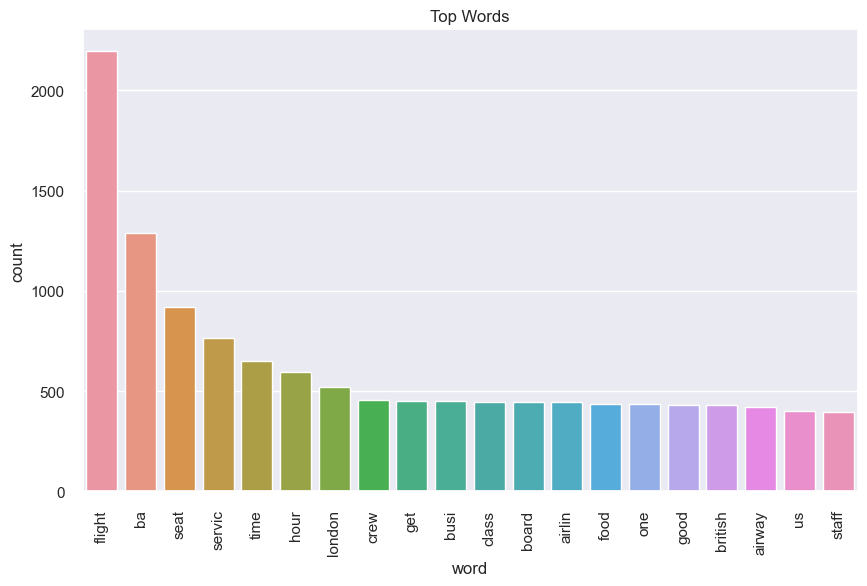

In [188]:
#Visualizing the top words
import seaborn as sns
sns.set()
temp=pd.DataFrame(freq_dist.most_common(20),columns=['word','count'])
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='word',y='count',data=temp)
plt.title('Top Words')
plt.xticks(rotation='vertical');

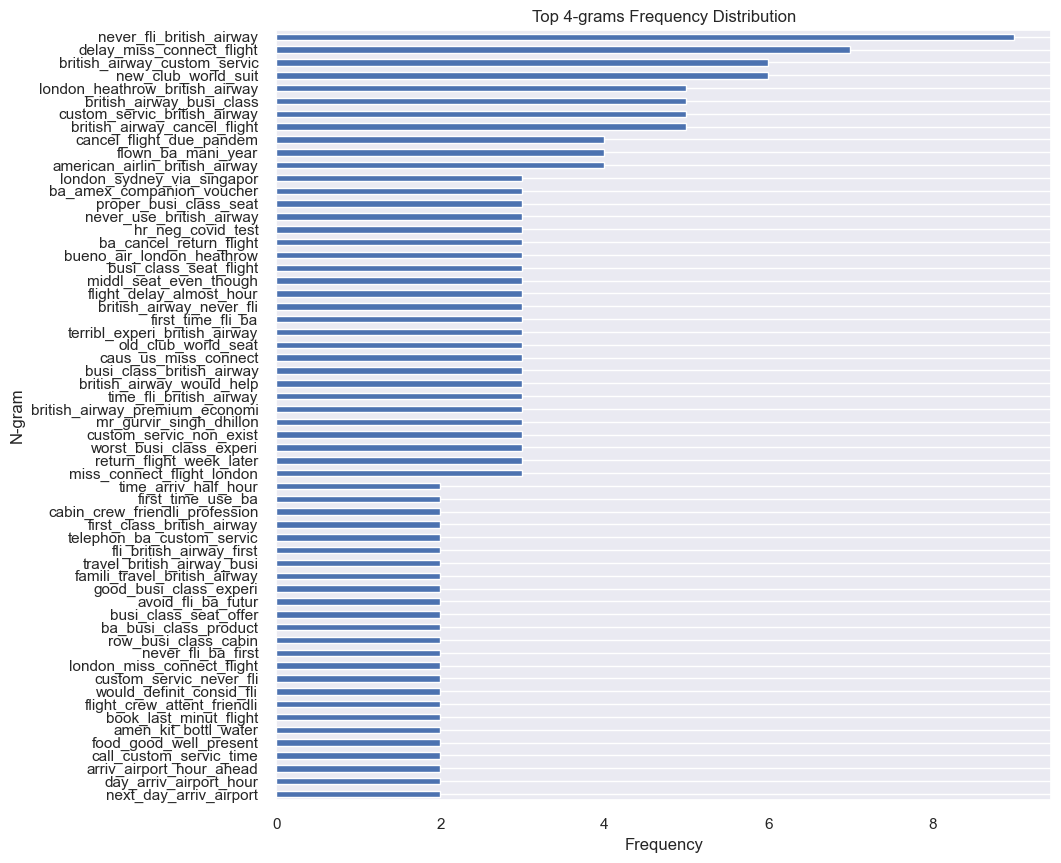

In [195]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
import pandas as pd
import matplotlib.pyplot as plt

def get_freq_dist(text, number_of_ngrams):
    from nltk import ngrams
    
    # Split the text into a list of words
    words = text.split()

    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    new_words = [word for word in words if word not in stopwords]

    # Generate n-grams
    ngrams_list = list(ngrams(new_words, number_of_ngrams))

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams_list).most_common(60)

    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join n-gram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to Pandas Series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    
    # Plotting
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")
    plt.title(f"Top {number_of_ngrams}-grams Frequency Distribution")
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.grid(axis='x')
    plt.show()

# Call the function with the reviews data and desired number of n-grams
get_freq_dist(reviews, 4)


# Predictive modeling of customer bookings

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
booking = pd.read_csv("D:/Files/customer_booking.csv", encoding="ISO-8859-1")
booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [198]:
#Check the information
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [199]:
#Check the unique words in the flight day 
booking["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [200]:
#Convert it into numerical data
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

booking["flight_day"] = booking["flight_day"].map(mapping)

In [201]:
booking["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

### Statistical Analysis

In [202]:
booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [203]:
booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [204]:
print("Booking not completed",len(booking[booking["booking_complete"]==0]))
print("Booking completed",len(booking[booking["booking_complete"]==1]))

Booking not completed 42522
Booking completed 7478


In [205]:
#Looking at the rows where booking was not completed
booking_not=booking[booking["booking_complete"]==0]
booking_not.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [206]:
#Looking at the rows where booking was completed
booking_com=booking[booking["booking_complete"]==1]
booking_com.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,1,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,1,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,2,AKLKUL,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,2,AKLKUL,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,2,AKLKUL,Malaysia,0,0,0,8.83,1


### Exploratory Data Analysis

<Axes: >

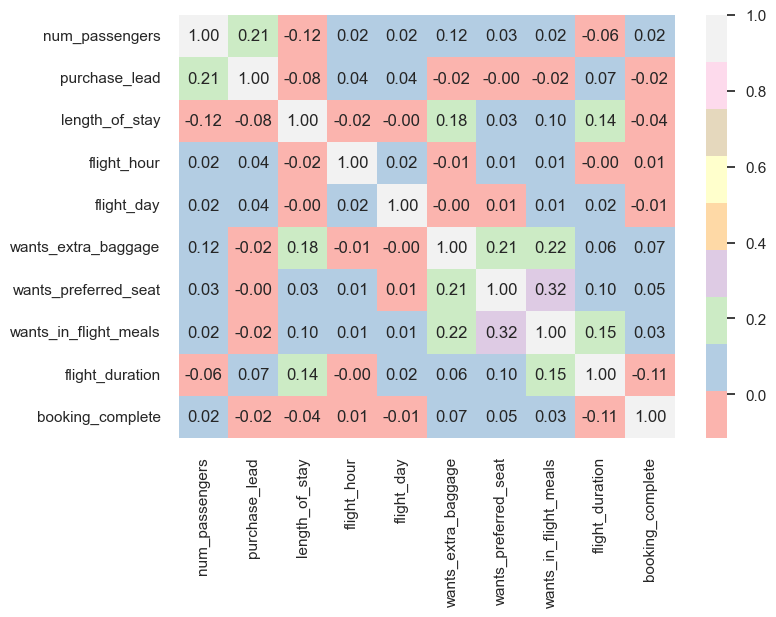

In [207]:
#Correlation
sns.heatmap(booking.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Pastel1")

(array([44382.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5618.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

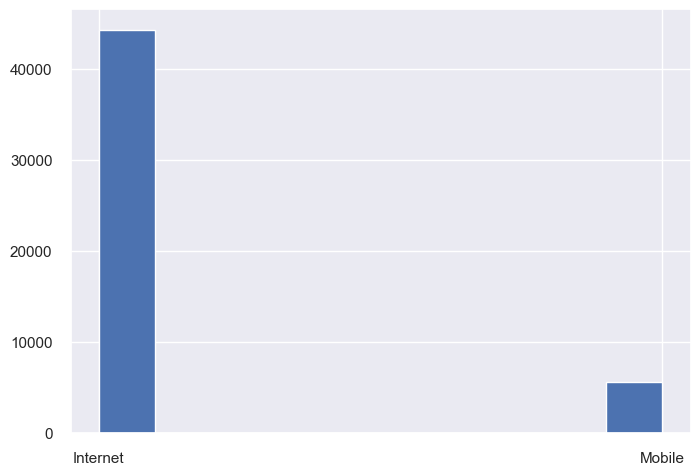

In [208]:
#Hist plot
plt.hist(booking["sales_channel"])

<Axes: xlabel='trip_type', ylabel='Count'>

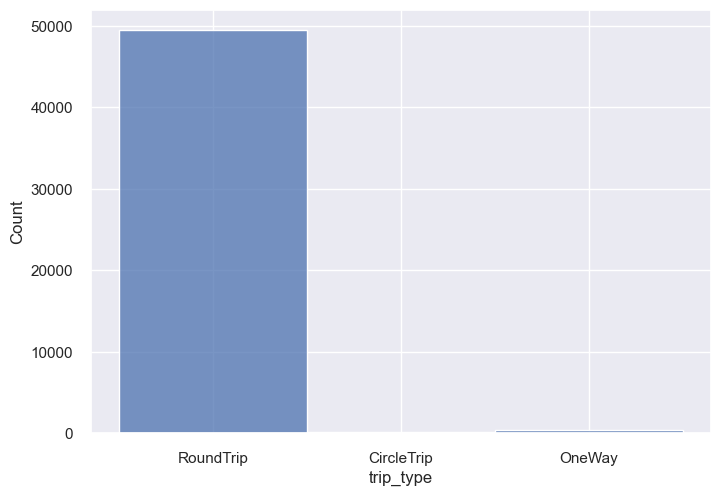

In [209]:
sns.histplot(booking["trip_type"])

<Axes: xlabel='purchase_lead', ylabel='Count'>

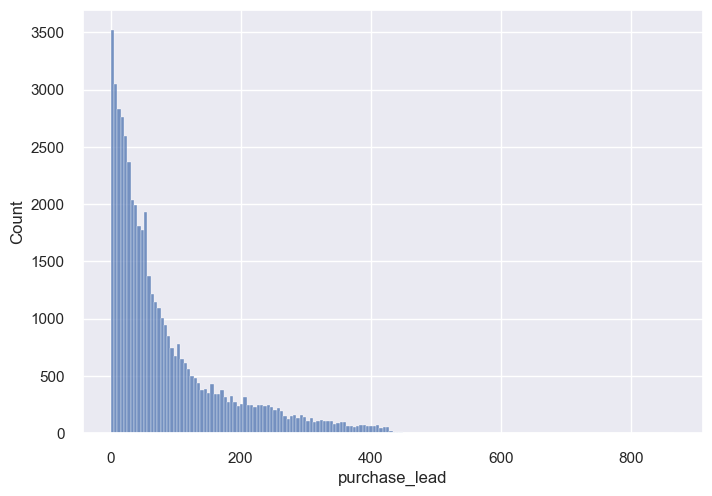

In [210]:
sns.histplot(booking["purchase_lead"])

<Axes: xlabel='purchase_lead', ylabel='Count'>

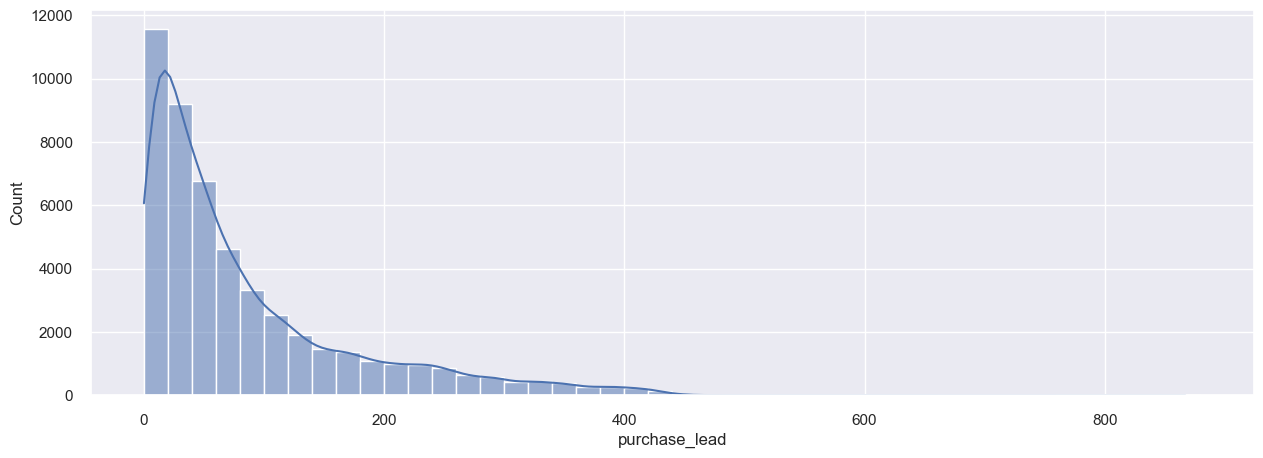

In [211]:
plt.figure(figsize=(15,5))
sns.histplot(data=booking, x="purchase_lead", binwidth=20,kde=True)

In [212]:
(booking.purchase_lead>548).value_counts()

False    49986
True        14
Name: purchase_lead, dtype: int64

In [213]:
(booking_com.purchase_lead>548).value_counts()

False    7476
True        2
Name: purchase_lead, dtype: int64

### Mostly are 1 passenger, bought ticket through internet,roundtrip

In [214]:
booking=booking[booking["purchase_lead"]<548]
booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


<Axes: xlabel='length_of_stay', ylabel='Count'>

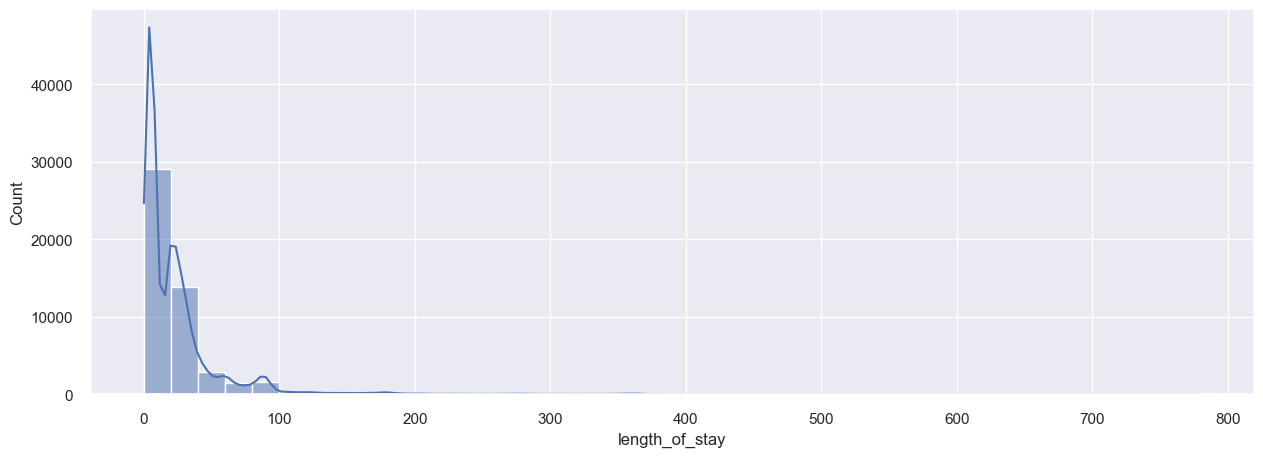

In [215]:
plt.figure(figsize=(15,5))
sns.histplot(data=booking, x="length_of_stay", binwidth=20,kde=True)

In [216]:
(booking.length_of_stay>500).value_counts()

False    49975
True        10
Name: length_of_stay, dtype: int64

In [217]:
(booking_com.length_of_stay>500).value_counts()

False    7477
True        1
Name: length_of_stay, dtype: int64

In [218]:
booking=booking[booking["length_of_stay"]<500]

Text(0, 0.5, 'No of Booking')

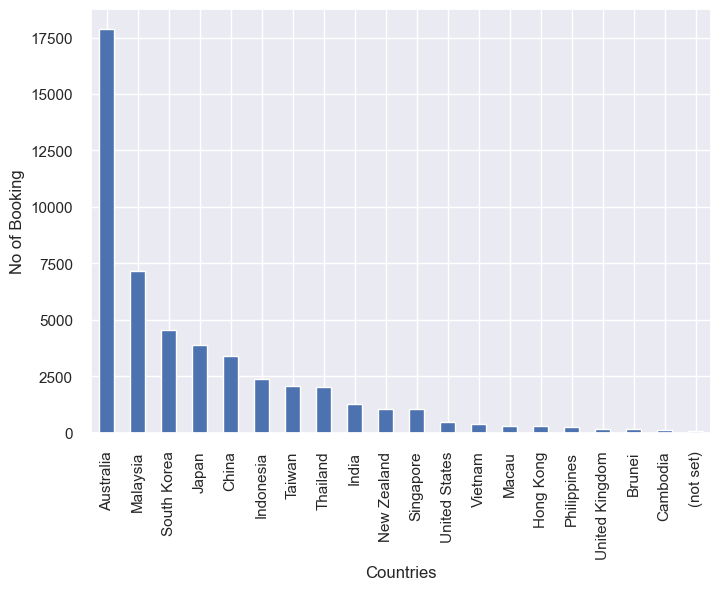

In [219]:
#visualization on booking data irrespective of whether the bookings were completed or not
ax=booking.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("No of Booking")

Text(0, 0.5, 'No of Booking')

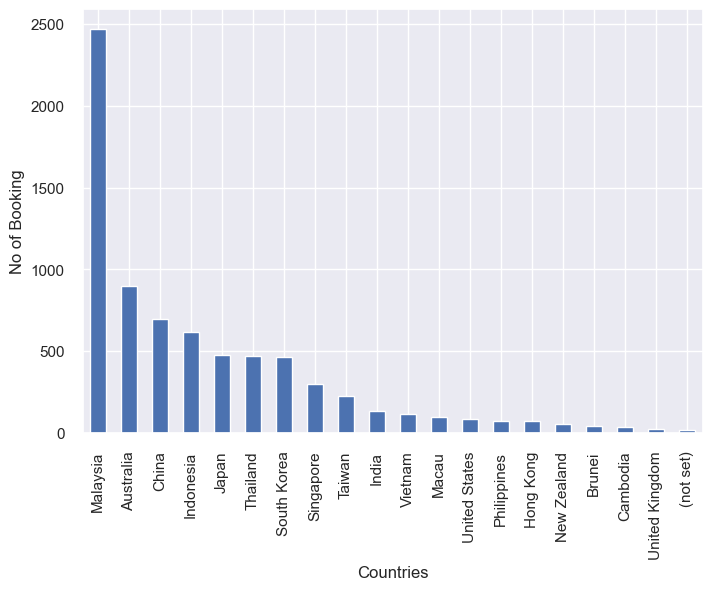

In [220]:
#Visualization contains only the completed booking data. 
ax=booking_com.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("No of Booking")

In [221]:
#Successful Bookings Percentage
successful_booking=(len(booking_com)/len(booking))*100
unsucessful_booking=100-successful_booking
print(f"From total 50,000 booking only {round(successful_booking,2)}% were successful.")

From total 50,000 booking only 14.96% were successful.


In [222]:
booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [223]:
#The data is imbalanced as we can see completed booking are less that the non-completed booking

In [224]:
#Convert catogoral data(object) into integar
from sklearn.preprocessing import LabelEncoder
df_encoder=booking.copy()
for column_name in booking.select_dtypes("object"):
    ln=LabelEncoder()
    df_encoder[column_name]=ln.fit_transform(booking[column_name])

In [225]:
df_encoder.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


## Training of model 

In [226]:
X=df_encoder.drop("booking_complete",axis=1)
y=booking["booking_complete"]

In [227]:
#Split the data into test/train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Apply  Random Forest Algorithm

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score, accuracy_score, confusion_matrix,f1_score,precision_score,recall_score
from yellowbrick.classifier import ConfusionMatrix

In [229]:
Rf=RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)
Rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

### Making Predictions

In [230]:
y_predict=Rf.predict(X_test)

### Model Evaluation

In [231]:
y_actual=y_test.values
print(classification_report(y_actual,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12762
           1       0.50      0.08      0.14      2231

    accuracy                           0.85     14993
   macro avg       0.68      0.53      0.53     14993
weighted avg       0.81      0.85      0.80     14993



D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9673260533988909

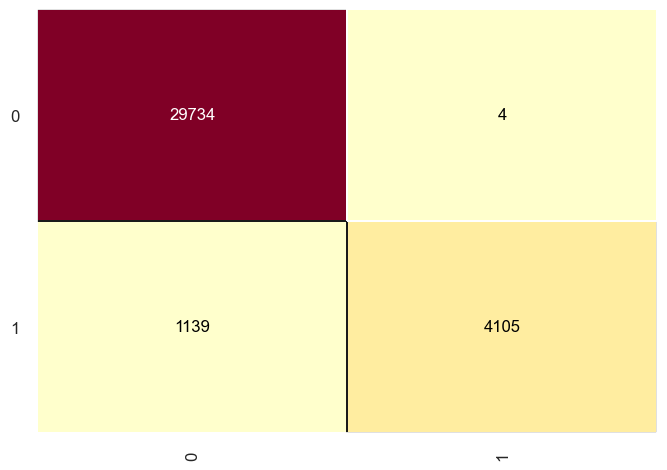

In [232]:
#Confusion matrix of training data
cm = ConfusionMatrix(Rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8513973187487495

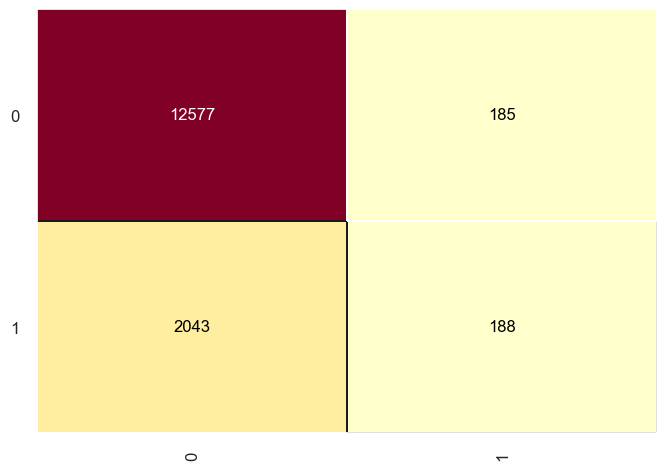

In [233]:
#Confusion matrix of testing data
cm = ConfusionMatrix(Rf, classes=[0,1])
cm.fit(X_test, y_test)

cm.score(X_test, y_test)


In [234]:
from tabulate import tabulate

# Calculate AUC score
auc_score = round(roc_auc_score(y_actual, y_predict), 6)

# Calculate recall and sensitivity
recall = round(recall_score(y_actual, y_predict), 3)
sensitivity = round(recall_score(y_actual, y_predict, pos_label=0), 3)

# Create a list of lists containing metric names and their values
table_data = [
    ["Accuracy", round(accuracy_score(y_actual, y_predict) * 100, 2)],
    ["AUC score", auc_score],
    ["Precision", round(precision_score(y_actual, y_predict), 3)],
    ["Recall", recall],
    ["Sensitivity", sensitivity],
    ["F1-score", round(f1_score(y_actual, y_predict), 2)]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="pretty"))

+-------------+----------+
|   Metric    |  Value   |
+-------------+----------+
|  Accuracy   |  85.14   |
|  AUC score  | 0.534885 |
|  Precision  |  0.504   |
|   Recall    |  0.084   |
| Sensitivity |  0.986   |
|  F1-score   |   0.14   |
+-------------+----------+
